In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import pandas as pd 
import csv

## 1) Learning Central Limit Theorem through dice rolls
1. 20-dice roll
    1. Roll a group of 20 dice using the web-based dice roll generator https://www.random.org/dice/?num=20 . Calculate the mean and standard deviation of these 20 numbers. 


In [54]:
def diceroll(rolls): # Takes in integer values & generates random number (1-6) for each roll
    results = []
    for i in range(0,rolls):
        results.append(random.randint(1,6))
    return results

roll = [5, 3, 2, 6, 3, 6, 3, 5, 1, 3, 1, 4, 6, 2, 4, 2, 2, 6, 5, 5]

print("Dice Roll: ",roll)

def mean(data): # Takes in a list of dice rolls and finds mean of entire list
    total = 0
    for i in data:
        total+=i
    mean = total/len(data)
    return mean

rollmean = mean(roll)
print("Mean of Dice: ", rollmean)

def stdev(data,mean): # Take in list of dice roll and their calculated mean
    summation=0
    for i in data:
        summation+=(i-mean)**2 # numerator of stdev = (value-mean)^2
        
    std = math.sqrt(summation/len(data))
    return std

rollstdev = stdev(roll,rollmean)
print("Standard Dev of Dice roll: ",round(rollstdev,3)) # rounding to 3 decimal places for stdev

Dice Roll:  [5, 3, 2, 6, 3, 6, 3, 5, 1, 3, 1, 4, 6, 2, 4, 2, 2, 6, 5, 5]
Mean of Dice:  3.7
Standard Dev of Dice roll:  1.676


     ii. Repeat this 19 more times, compute mean, the standard deviation of the 20 trials and the error in the mean.
     Compare your computations with the expectation for the mean, the standard deviation and the error in the mean for your specific number of 20-dice rolls given the theoretical standard deviation.

In [55]:
# Creating entirely new rolls for these ones
rolls = []
for i in range(0,20):
    rolls.append(diceroll(20))
    
# Now perform stats on roll data
means = []
stdevs = []
meanerr = []

for i in rolls:
    localmean = mean(i)
    localstdev = stdev(i,localmean)
    means.append(localmean)
    stdevs.append(localstdev)
    
    # find mean error with (stdev/sqrt(N))
    localmeanerr = (localstdev)/math.sqrt(len(i))
    meanerr.append(localmeanerr)
    print("Roll:",i,"\tMean:",round(localmean,3),"\tStdev:",round(localstdev,3),"\tMeanerr:",round(localmeanerr,3))
    

Roll: [6, 3, 1, 5, 1, 5, 3, 2, 3, 5, 4, 1, 2, 3, 5, 5, 5, 3, 1, 2] 	Mean: 3.25 	Stdev: 1.609 	Meanerr: 0.36
Roll: [6, 2, 2, 3, 4, 4, 3, 1, 4, 5, 5, 1, 3, 4, 5, 6, 4, 1, 2, 2] 	Mean: 3.35 	Stdev: 1.558 	Meanerr: 0.348
Roll: [2, 2, 4, 3, 6, 2, 4, 5, 2, 1, 6, 4, 4, 4, 5, 6, 4, 2, 6, 3] 	Mean: 3.75 	Stdev: 1.545 	Meanerr: 0.346
Roll: [1, 4, 3, 3, 2, 1, 5, 1, 4, 5, 2, 3, 5, 4, 6, 4, 4, 5, 2, 6] 	Mean: 3.5 	Stdev: 1.565 	Meanerr: 0.35
Roll: [5, 2, 4, 5, 3, 1, 6, 6, 3, 4, 4, 5, 1, 4, 2, 6, 2, 2, 3, 2] 	Mean: 3.5 	Stdev: 1.597 	Meanerr: 0.357
Roll: [6, 6, 6, 5, 5, 3, 5, 6, 6, 5, 1, 5, 1, 4, 6, 5, 3, 1, 6, 1] 	Mean: 4.3 	Stdev: 1.873 	Meanerr: 0.419
Roll: [6, 4, 5, 4, 6, 2, 2, 2, 1, 1, 2, 5, 5, 2, 3, 6, 1, 2, 4, 2] 	Mean: 3.25 	Stdev: 1.728 	Meanerr: 0.386
Roll: [2, 2, 5, 3, 2, 5, 1, 5, 5, 6, 5, 4, 2, 3, 6, 6, 5, 1, 1, 6] 	Mean: 3.75 	Stdev: 1.813 	Meanerr: 0.405
Roll: [1, 2, 5, 2, 2, 1, 1, 5, 2, 2, 6, 5, 4, 2, 1, 2, 1, 3, 6, 1] 	Mean: 2.7 	Stdev: 1.735 	Meanerr: 0.388
Roll: [1, 4, 5, 1, 5, 4, 

### Analysis
The theoretical standard deviation we calculated previously for a 1-time 20 dice roll is: $\sigma=1.676$. The observed standard deviation of the 20 20-dice rolls we did (taking an average of all the standard deviations) is printed below.

In [62]:
print("20-dice roll stdev in mean: ", np.std(means))
print("20-dice roll with my stdev in mean:", stdev(means,mean(means)))

avgstdev = mean(stdevs)
print("Average of Standard Deviations: ",round(avgstdev,3))

20-dice roll stdev in mean:  0.3707762128292482
20-dice roll with my stdev in mean: 0.3707762128292481
Average of Standard Deviations:  1.705


    B. Plot the distributions of all the three dice roll experiments performed (one dice roll, 5 dice roll and 20 dice roll). For one dice roll and 5 dice rolls you can use the data you obtained in the first week’s class assignment. For 20 dice roll use the output from (a).

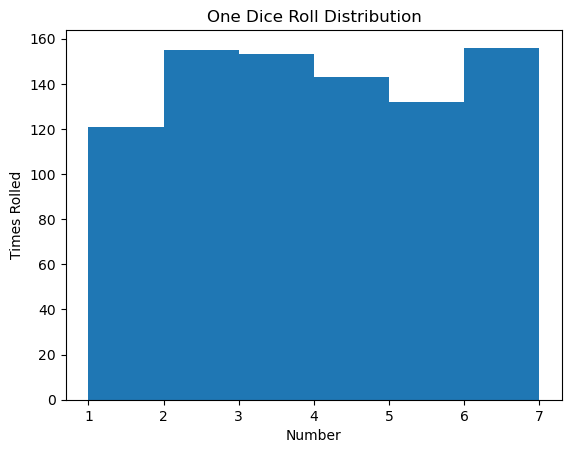

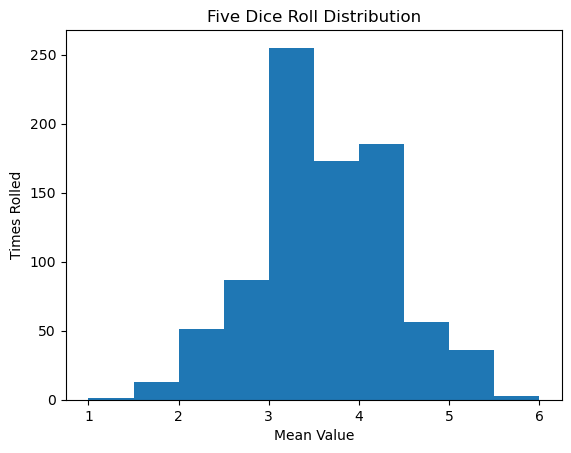

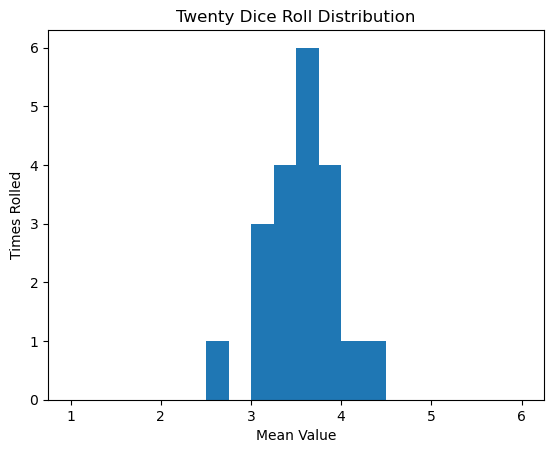

In [58]:
# Import 1 dice roll data to onediceroll list

onediceroll = []
with open('/home/robbler/Thermo Lab/Lab 1/PHY289-2023 1-Dice Rolls.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        for i in row:
            onediceroll.append(float(i))

plt.hist(onediceroll,bins=6,range=(1,7))
plt.ylabel("Times Rolled")
plt.xlabel("Number")
plt.title("One Dice Roll Distribution")
plt.show()

# Now for 5-dice roll with means
data = []
# import data
with open('/home/robbler/Thermo Lab/Lab 1/PHY289-2023 5-Dice Rolls.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        #print(', '.join(row))
        for i in row:
            data.append(float(i))

plt.title("Five Dice Roll Distribution")
plt.xlabel("Mean Value")
plt.ylabel("Times Rolled")                        
plt.hist(data, bins=10, range=(1,6))
plt.show()

# Now for 20-dice roll with means
twdiceroll = []
for v in rolls:
    twdiceroll.append(mean(v))

plt.title("Twenty Dice Roll Distribution")
plt.xlabel("Mean Value")
plt.ylabel("Times Rolled")                        
plt.hist(twdiceroll, bins=20, range=(1,6))
plt.show()


## 2. Poisson Distribution

(from text book; Problem 3.7) In the study of radioactive decay 58 successive experiments for one second yielded the following counts (these are the data plotted in Fig. shown). 
1. total counts recorded
2. mean count
3. mean count rate

In [80]:
# 1. total count = 423

# 2. mean count = ?

n = [1,3,4,5,6,7,8,9,10,11,12,13]
o = [1,2,3,6,9,11,8,8,6,2,1,1]
data = []

counter=-1
for i in o:
    counter+=1
    for v in range(0,i):
        data.append(n[counter])
        
        
print(data)
print(mean(data))

[1, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 12, 13]
7.293103448275862


### 3. Approximation for high means
    1. Plot a histogram of a Poisson distribution with mean 35. Using the same axes plot the continuous function of a Gaussian with a mean of 35, and standard deviation √35 . Comment on similarities and differences between the distributions. 
    2. Repeat a) for a mean of 5 

The Poisson probability function is: 
$$f\left( k\right) =e^{-\mu }\dfrac {\mu ^{k}}{k!}$$
The mean and variance are both $\mu$

set a sensible range for plotting the distribution: $\pm 4\sigma$: $\sigma = \sqrt{\text{mean}}$

0 13
Probability of being  0 : 0.6737946999085467
Probability of being  1 : 3.368973499542734
Probability of being  2 : 8.422433748856834
Probability of being  3 : 14.037389581428055
Probability of being  4 : 17.54673697678507
Probability of being  5 : 17.54673697678507
Probability of being  6 : 14.62228081398756
Probability of being  7 : 10.444486295705401
Probability of being  8 : 6.527803934815875
Probability of being  9 : 3.626557741564375
Probability of being  10 : 1.8132788707821872
Probability of being  11 : 0.8242176685373579
Probability of being  12 : 0.3434240285572325
Probability of being  13 : 0.13208616482970478


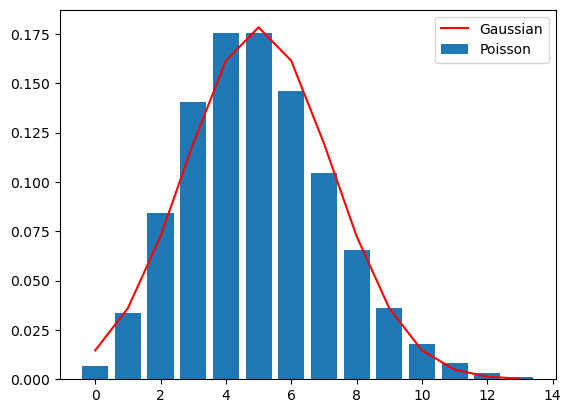

In [41]:
# Plot poisson distibution

mean = 5
stdev = 4*math.sqrt(mean)
upperlim = mean + stdev
lowerlim = mean - stdev
iupperlim = math.trunc(upperlim)
ilowerlim = math.trunc(lowerlim)
if ilowerlim < 0:
    ilowerlim = 0
poissonprob = []
print(ilowerlim,iupperlim)
for i in range(ilowerlim,iupperlim+1):
    poissonprob.append(math.exp(-1*mean)*mean**i/math.factorial(i))
xrange = list(range(ilowerlim,iupperlim+1))
counter=0
for i in xrange:
    print('Probability of being ',i,':',poissonprob[counter]*100)
    counter+=1


plt.xticks()
plt.bar(xrange, poissonprob, label='Poisson')
plt.plot(xrange, st.norm.pdf(xrange,mean,math.sqrt(mean)),'r-', label='Gaussian')
plt.legend()
plt.show()
